In [1]:

# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
# execute if warnings should be ignored:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 2500)


In [2]:

df01 = pd.read_csv("autoscout24_numerisch.csv")


In [3]:
df01.shape

(46371, 15)

In [4]:
df01.describe()

,mileage,price,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
count,46371.000000,4.637100e+04,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000
mean,71150.808027,1.657495e+04,133.003494,2016.012529,47.120399,421.950918,5.228677,0.660973,3.663475,5.012529
std,62268.606055,1.930898e+04,75.443174,3.154958,21.620282,256.843797,2.363117,0.475928,0.989698,3.154958
min,0.000000,1.100000e+03,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19833.500000,7.490000e+03,86.000000,2013.000000,29.000000,184.000000,2.000000,0.000000,4.000000,2.000000
50%,60000.000000,1.099900e+04,116.000000,2016.000000,54.000000,402.000000,7.000000,1.000000,4.000000,5.000000
75%,105000.000000,1.949000e+04,150.000000,2019.000000,64.000000,647.000000,7.000000,1.000000,4.000000,8.000000
max,699000.000000,1.199900e+06,850.000000,2021.000000,75.000000,840.000000,10.000000,2.000000,4.000000,10.000000


In [5]:
df01.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,8,33,2,1,4,0
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,72,396,7,1,4,0
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,63,323,7,1,4,0
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,61,508,7,1,4,0
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,56,32,7,1,4,0


In [6]:

# data set with the 5 best-selling car brands:
df01["make"].value_counts().head(5)


make
Volkswagen    6931
Opel          4808
Ford          4440
Skoda         2888
Renault       2829
Name: count, dtype: int64

In [7]:

# remove all other car brands from the data set:
df02 = df01[(df01["make"] == "Volkswagen") | (df01["make"] == "Opel") |
           (df01["make"] == "Ford") | (df01["make"] == "Skoda") | (df01["make"] == "Renault")]


In [8]:

df02["make"].value_counts()


make
Volkswagen    6931
Opel          4808
Ford          4440
Skoda         2888
Renault       2829
Name: count, dtype: int64

In [9]:

# average price by brand:
vw = df01[(df01["make"] == "Volkswagen")]
opel = df01[(df01["make"] == "Opel")]
ford = df01[(df01["make"] == "Ford")]
skoda = df01[(df01["make"] == "Skoda")]
renault = df01[(df01["make"] == "Renault")]

print(f"Price(Avg) Volkswagen: {vw['price'].mean().round(2)} €")
print(f"Price(Avg) Opel:       {opel['price'].mean().round(2)} €")
print(f"Price(Avg) Ford:       {ford['price'].mean().round(2)} €")
print(f"Price(Avg) Skoda:      {skoda['price'].mean().round(2)} €")
print(f"Price(Avg) Renault:    {renault['price'].mean().round(2)} €")


Price(Avg) Volkswagen: 16065.93 €
Price(Avg) Opel:       10443.97 €
Price(Avg) Ford:       13794.86 €
Price(Avg) Skoda:      13726.29 €
Price(Avg) Renault:    11286.84 €



# ML - machine learning


In [10]:

# --> supervised Learning (numeric): data set has the target with label “price”.
# for numeric predictions and speed:    --> LinearRegression, DecisionTree
# for numeric predictions and accuracy: --> RandomForest


In [11]:

# --> with all features


In [12]:
df02.iloc[::,1:7]

,make,model,fuel,gear,offerType,price
1,Volkswagen,Golf,Gasoline,Manual,Used,6877
3,Renault,Megane,Gasoline,Manual,Used,6950
6,Renault,Scenic,Diesel,Manual,Used,6970
7,Opel,Zafira,Gasoline,Manual,Used,6972
9,Ford,Transit,Diesel,Manual,Used,6990
...,...,...,...,...,...,...
46342,Renault,Grand Scenic,Gasoline,Manual,Demonstration,32480
46343,Volkswagen,Golf,Diesel,Automatic,Pre-registered,32490
46345,Renault,Kadjar,Gasoline,Manual,Demonstration,32680
46347,Volkswagen,T-Cross,Gasoline,Automatic,Demonstration,32880


In [13]:

# with all features without the target "price":
X01 = df02.drop(df02.iloc[::,1:7],axis=1)


In [14]:
X01

,mileage,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
1,92800,122.0,2011,72,396,7,1,4,0
3,96200,110.0,2011,61,508,7,1,4,0
6,91894,131.0,2011,61,678,2,1,4,0
7,127500,116.0,2011,54,818,7,1,4,0
9,104,86.0,2011,29,740,2,1,4,0
...,...,...,...,...,...,...,...,...,...
46342,5000,158.0,2021,61,413,7,1,0,10
46343,100,150.0,2021,72,396,2,0,3,10
46345,6000,158.0,2021,61,449,7,1,0,10
46347,4800,150.0,2021,72,700,7,0,0,10


In [15]:
X02 = X01.drop("year",axis=1)

In [16]:
X02

,mileage,hp,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
1,92800,122.0,72,396,7,1,4,0
3,96200,110.0,61,508,7,1,4,0
6,91894,131.0,61,678,2,1,4,0
7,127500,116.0,54,818,7,1,4,0
9,104,86.0,29,740,2,1,4,0
...,...,...,...,...,...,...,...,...
46342,5000,158.0,61,413,7,1,0,10
46343,100,150.0,72,396,2,0,3,10
46345,6000,158.0,61,449,7,1,0,10
46347,4800,150.0,72,700,7,0,0,10


In [17]:

# the label "price":
y01 = df02["price"]


In [18]:
y01

1         6877
3         6950
6         6970
7         6972
9         6990
         ...  
46342    32480
46343    32490
46345    32680
46347    32880
46365    12980
Name: price, Length: 21896, dtype: int64

In [19]:

# create test/training data set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X02, y01, test_size=0.20, random_state=101)


In [20]:
# standardScaler by using LinearRegression,DecisionTree and RandomForest not recommended --> no standardization!

In [21]:

# import algorithms:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#initialize:
lin = LinearRegression()
dec = DecisionTreeRegressor()
rfc = RandomForestRegressor()


In [22]:

# train:
lin01 = lin.fit(X_train,y_train)
dec01 = DecisionTreeRegressor(random_state=101).fit(X_train,y_train)
rfc01 = RandomForestRegressor(n_estimators=1000,random_state=101).fit(X_train,y_train)


In [23]:

# predictions:
pred_lin01 = lin01.predict(X_test)
pred_dec01 = dec01.predict(X_test)
pred_rfc01 = rfc01.predict(X_test)


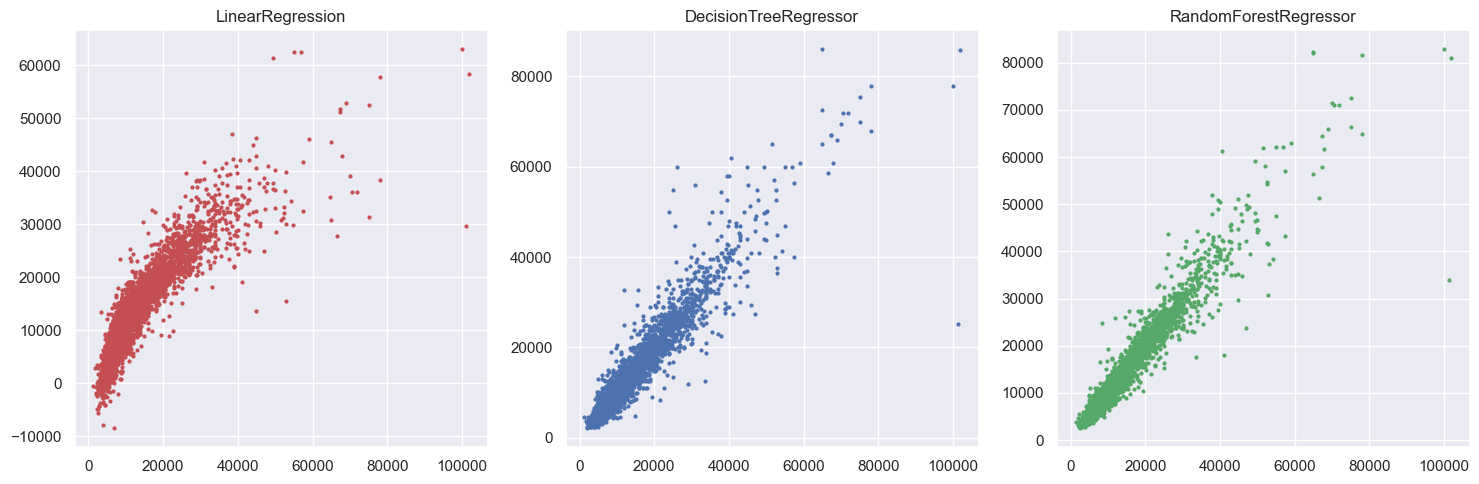

In [24]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].scatter(y_test,pred_lin01,c="r",s=4)
axes[0].set_title("LinearRegression")
axes[1].scatter(y_test,pred_dec01,c="b",s=4)
axes[1].set_title('DecisionTreeRegressor')
axes[2].scatter(y_test,pred_rfc01,c="g",s=4)
axes[2].set_title('RandomForestRegressor')
fig.tight_layout()
plt.show()


In [25]:

from sklearn import metrics


In [26]:

# evaluate model:
#         --> best results with randomForest,
#             closely followed by decisionTree
print("LinearRegression:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test, pred_lin01))             
print("Mean squared error :", metrics.mean_squared_error(y_test, pred_lin01))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test, pred_lin01)))
print()
print("DecisionTreeRegressor:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test, pred_dec01))             
print("Mean squared error :", metrics.mean_squared_error(y_test, pred_dec01))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test, pred_dec01)))     
print()
print("RandomForestRegressor:")
print("Mean absolute error:", metrics.mean_absolute_error(y_test, pred_rfc01))             
print("Mean squared error :", metrics.mean_squared_error(y_test, pred_rfc01))                
print("Root squared error :", np.sqrt(metrics.mean_squared_error(y_test, pred_rfc01)))   


LinearRegression:
Mean absolute error: 2717.379954016268
Mean squared error : 18210092.674564373
Root squared error : 4267.3285173003

DecisionTreeRegressor:
Mean absolute error: 1641.3577854644222
Mean squared error : 9231177.698564775
Root squared error : 3038.285322112585

RandomForestRegressor:
Mean absolute error: 1325.4164684246298
Mean squared error : 6076575.911530212
Root squared error : 2465.0711777817314


In [27]:

# test run - random sample:
df02.sample(5,random_state=80)   


,mileage,make,model,fuel,gear,offerType,price,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
36276,70000,Skoda,Roomster,Gasoline,Automatic,Used,9890,105.0,2013,64,629,7,0,4,2
45196,10000,Volkswagen,Golf,Gasoline,Manual,Demonstration,28890,150.0,2020,72,396,7,1,0,9
12829,20,Renault,Kangoo,Gasoline,Automatic,Used,15070,114.0,2019,61,452,7,0,4,8
21289,15750,Volkswagen,Caddy,Diesel,Automatic,Demonstration,28750,150.0,2020,72,219,2,0,0,9
9204,16551,Volkswagen,Polo,Gasoline,Manual,Used,11944,65.0,2018,72,566,7,1,4,7


In [32]:

# e.g. "renault kangoo":
pred_lin01_probe = lin01.predict([[20,114.0,61,452,7,0,4,8]])
pred_dec01_probe = dec01.predict([[20,114.0,61,452,7,0,4,8]])
pred_rfc01_probe = rfc01.predict([[20,114.0,61,452,7,0,4,8]])
print("LinearRegression: ",pred_lin01_probe,"; tatsächlicher Preis: 15070 €")
print()
print("DecisionTreeRegressor: ",pred_dec01_probe,"; tatsächlicher Preis: 15070 €")    
print()
print("RandomForestRegressor: ",pred_rfc01_probe,"; tatsächlicher Preis: 15070 €")


LinearRegression:  [19613.41088692] ; tatsächlicher Preis: 15070 €

DecisionTreeRegressor:  [14916.66666667] ; tatsächlicher Preis: 15070 €

RandomForestRegressor:  [15083.14115296] ; tatsächlicher Preis: 15070 €


In [33]:

X_train.shape


(17516, 8)

In [34]:
X_test.shape

(4380, 8)

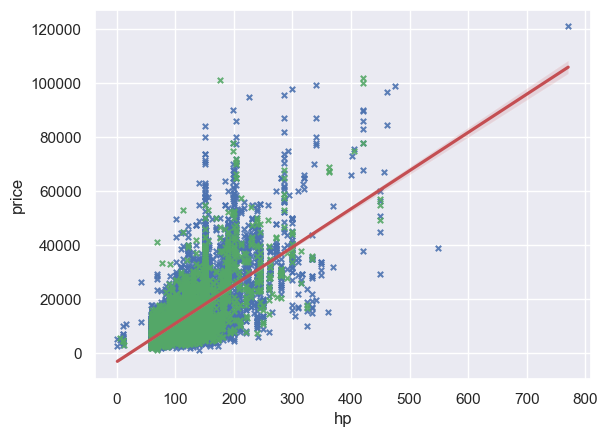

In [60]:
# visualization of the model

# comparison: feature with the strongest correlation is “hp” with the label “price”
# regression line in red
plt.scatter(X_train["hp"],y_train,color="b",alpha=0.9,s=15,marker="x")
plt.scatter(X_test["hp"],y_test,color="g",alpha=0.9,s=15,marker="x")
sns.regplot(x=df02["hp"], y=df02["price"], scatter=False, logx=False,color="r")
plt.show()
